In [83]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

import scipy.stats
from scipy.stats import probplot
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from bayes_opt import BayesianOptimization

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance
from lightgbm import LGBMRegressor
from ngboost import NGBRegressor
from ngboost.distns import *
from ngboost.learners import *
from ngboost.scores import MLE

In [55]:
# 폰트
import matplotlib.font_manager as fm
fm._rebuild()
plt.rc('font', family='NanumGothic')

for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = "+fontInfo.fname)

NanumGothic = C:\Windows\Fonts\EXTRABOLD.TTF
NanumGothic = C:\WINDOWS\Fonts\EXTRABOLD.TTF
NanumBarunGothic = C:\Windows\Fonts\NanumBarunGothicLight.ttf
NanumGothic = C:\Windows\Fonts\.TTF
NanumBarunGothic = C:\WINDOWS\Fonts\NanumBarunGothicUltraLight.ttf
NanumBarunGothic = C:\WINDOWS\Fonts\NanumBarunGothic.ttf
NanumGothic = C:\Windows\Fonts\BOLD.TTF
NanumGothic = C:\WINDOWS\Fonts\.TTF
NanumGothic = C:\WINDOWS\Fonts\BOLD.TTF
NanumBarunGothic = C:\Windows\Fonts\NanumBarunGothicUltraLight.ttf
NanumBarunGothic = C:\Windows\Fonts\NanumBarunGothicBold.ttf
NanumBarunGothic = C:\WINDOWS\Fonts\NanumBarunGothicLight.ttf
NanumBarunGothic = C:\Windows\Fonts\NanumBarunGothic.ttf
NanumBarunGothic = C:\WINDOWS\Fonts\NanumBarunGothicBold.ttf


In [16]:
train = pd.read_csv('results/energy_cons_train.csv', parse_dates = ['Date'])
test = pd.read_csv('results/energy_cons_test.csv', parse_dates = ['Date'])

In [17]:
train

,Date,Consumption (MWh),rolling_mean_t41,rolling_mean_t48,rolling_mean_t72,rolling_mean_t168,rolling_mean_t38,rolling_mean_t50,rolling_mean_t62,rolling_median_t38,...,rolling_std_t50,rolling_std_t62,hourofday,quarter,month,year,dayofyear,dayofmonth,weekofyear,days_in_month
0,2016-01-08 00:00:00,10.261268,10.258853,10.281591,10.283477,10.176496,10.286262,10.397811,10.405176,10.242484,...,0.151209,0.155102,0,1,1,2016,8,8,1,31
1,2016-01-08 01:00:00,10.207782,10.410436,10.226115,10.226955,10.126344,10.301210,10.396919,10.404201,10.242484,...,0.150254,0.154070,1,1,1,2016,8,8,1,31
2,2016-01-08 02:00:00,10.164941,10.498421,10.187913,10.178722,10.066185,10.319135,10.395417,10.402959,10.242484,...,0.149013,0.153056,2,1,1,2016,8,8,1,31
3,2016-01-08 03:00:00,10.139214,10.524438,10.155032,10.160887,10.019749,10.342480,10.393985,10.401455,10.334645,...,0.147716,0.151642,3,1,1,2016,8,8,1,31
4,2016-01-08 04:00:00,10.131784,10.541274,10.160670,10.164931,9.998975,10.369701,10.392607,10.399921,10.453558,...,0.146369,0.150078,4,1,1,2016,8,8,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34891,2019-12-31 19:00:00,10.461696,10.209876,10.501500,10.538502,10.561107,10.345012,10.353539,10.390300,10.361128,...,0.113560,0.124963,19,4,12,2019,365,31,1,31
34892,2019-12-31 20:00:00,10.404196,10.185895,10.482046,10.512500,10.536103,10.323179,10.355123,10.389744,10.295012,...,0.111734,0.125541,20,4,12,2019,365,31,1,31
34893,2019-12-31 21:00:00,10.362368,10.178346,10.462290,10.489254,10.515660,10.310573,10.360331,10.390356,10.295012,...,0.108277,0.125269,21,4,12,2019,365,31,1,31
34894,2019-12-31 22:00:00,10.306229,10.192400,10.430865,10.463809,10.486955,10.311311,10.370973,10.391908,10.295012,...,0.108025,0.126058,22,4,12,2019,365,31,1,31


In [18]:
test

,Date,Consumption (MWh),rolling_mean_t41,rolling_mean_t48,rolling_mean_t72,rolling_mean_t168,rolling_mean_t38,rolling_mean_t50,rolling_mean_t62,rolling_median_t38,...,rolling_std_t50,rolling_std_t62,hourofday,quarter,month,year,dayofyear,dayofmonth,weekofyear,days_in_month
0,2020-01-01 00:00:00,10.244466,10.350226,10.326304,10.358097,10.373452,10.334782,10.392527,10.395151,10.295012,...,0.122653,0.130037,0,1,1,2020,1,1,1,31
1,2020-01-01 01:00:00,10.186763,10.490908,10.263719,10.295530,10.319549,10.353474,10.401529,10.396669,10.295012,...,0.131180,0.132258,1,1,1,2020,1,1,1,31
2,2020-01-01 02:00:00,10.138124,10.571919,10.209876,10.245622,10.282826,10.375989,10.409073,10.398116,10.306972,...,0.137087,0.134082,2,1,1,2020,1,1,1,31
3,2020-01-01 03:00:00,10.098747,10.602886,10.185895,10.213379,10.261006,10.404269,10.416634,10.399651,10.420567,...,0.142698,0.136024,3,1,1,2020,1,1,1,31
4,2020-01-01 04:00:00,10.074558,10.620262,10.178346,10.199136,10.252256,10.437895,10.424493,10.401357,10.531414,...,0.148252,0.138209,4,1,1,2020,1,1,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,2020-03-14 19:00:00,10.494452,10.262574,10.528134,10.538959,10.490371,10.380813,10.407825,10.407728,10.392588,...,0.097723,0.094339,19,1,3,2020,74,14,11,31
1772,2020-03-14 20:00:00,10.483987,10.242466,10.525632,10.532238,10.474037,10.363119,10.407046,10.407408,10.333138,...,0.098716,0.094760,20,1,3,2020,74,14,11,31
1773,2020-03-14 21:00:00,10.454384,10.231517,10.498571,10.503682,10.451366,10.346176,10.406864,10.407239,10.314126,...,0.098870,0.094903,21,1,3,2020,74,14,11,31
1774,2020-03-14 22:00:00,10.416152,10.235107,10.466764,10.468788,10.398300,10.340004,10.407130,10.407460,10.314126,...,0.098986,0.094995,22,1,3,2020,74,14,11,31


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34896 entries, 0 to 34895
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                34896 non-null  datetime64[ns]
 1   Consumption (MWh)   34896 non-null  float64       
 2   rolling_mean_t41    34896 non-null  float64       
 3   rolling_mean_t48    34896 non-null  float64       
 4   rolling_mean_t72    34896 non-null  float64       
 5   rolling_mean_t168   34896 non-null  float64       
 6   rolling_mean_t38    34896 non-null  float64       
 7   rolling_mean_t50    34896 non-null  float64       
 8   rolling_mean_t62    34896 non-null  float64       
 9   rolling_median_t38  34896 non-null  float64       
 10  rolling_median_t50  34896 non-null  float64       
 11  rolling_median_t62  34896 non-null  float64       
 12  rolling_std_t38     34896 non-null  float64       
 13  rolling_std_t50     34896 non-null  float64   

In [20]:
train.describe()

,Consumption (MWh),rolling_mean_t41,rolling_mean_t48,rolling_mean_t72,rolling_mean_t168,rolling_mean_t38,rolling_mean_t50,rolling_mean_t62,rolling_median_t38,rolling_median_t50,...,rolling_std_t50,rolling_std_t62,hourofday,quarter,month,year,dayofyear,dayofmonth,weekofyear,days_in_month
count,34896.000000,34896.000000,34896.000000,34896.000000,34896.000000,34896.000000,34896.000000,34896.000000,34896.000000,34896.000000,...,34896.000000,34896.000000,34896.000000,34896.000000,34896.000000,34896.000000,34896.000000,34896.000000,34896.000000,34896.000000
mean,10.384395,10.384333,10.384326,10.384353,10.383823,10.384331,10.384330,10.384342,10.390714,10.424027,...,0.117546,0.122245,11.500029,2.515818,6.549519,2017.506190,183.987620,15.786107,26.535076,30.456671
std,0.162760,0.162736,0.162743,0.162765,0.162898,0.122791,0.101743,0.095474,0.135065,0.113157,...,0.054934,0.052902,6.922253,1.114858,3.435636,1.116186,104.956711,8.782473,14.989016,0.796656
min,0.000000,0.000000,0.000000,0.000000,0.000000,9.283491,9.780869,9.970676,9.875332,9.914785,...,0.054398,0.079424,0.000000,1.000000,1.000000,2016.000000,1.000000,1.000000,1.000000,28.000000
25%,10.268843,10.268720,10.268720,10.268720,10.268159,10.306338,10.324324,10.324790,10.296857,10.366876,...,0.104285,0.109512,5.750000,2.000000,4.000000,2017.000000,93.000000,8.000000,14.000000,30.000000
50%,10.402990,10.402964,10.402964,10.402981,10.402608,10.386623,10.386467,10.383051,10.399896,10.430009,...,0.114704,0.119067,11.500000,3.000000,7.000000,2018.000000,184.000000,16.000000,27.000000,31.000000
75%,10.496041,10.495956,10.495956,10.496054,10.495489,10.466011,10.452784,10.450726,10.482945,10.501456,...,0.127252,0.130055,17.250000,4.000000,10.000000,2019.000000,275.000000,23.000000,40.000000,31.000000
max,10.759251,10.759251,10.759251,10.759251,10.759251,10.702830,10.612019,10.610250,10.703054,10.666206,...,2.107199,1.493773,23.000000,4.000000,12.000000,2019.000000,366.000000,31.000000,52.000000,31.000000


<AxesSubplot:>

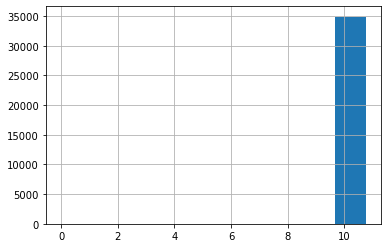

In [21]:
# Train Set의 타겟 변수 분포 확인
train['Consumption (MWh)'].hist()

<AxesSubplot:xlabel='hourofday'>

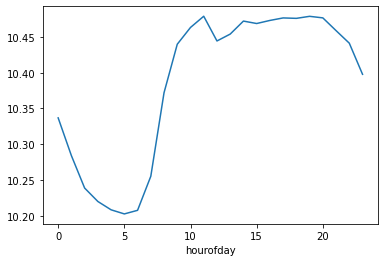

In [23]:
train.groupby(['hourofday'])['Consumption (MWh)'].mean().plot()

In [61]:
train.corr()

,Consumption (MWh),rolling_mean_t41,rolling_mean_t48,rolling_mean_t72,rolling_mean_t168,rolling_mean_t38,rolling_mean_t50,rolling_mean_t62,rolling_median_t38,rolling_median_t50,...,rolling_std_t50,rolling_std_t62,hourofday,quarter,month,year,dayofyear,dayofmonth,weekofyear,days_in_month
Consumption (MWh),1.000000,0.079674,0.686866,0.637134,0.782346,0.430180,0.346930,0.330048,0.364325,0.349791,...,-0.000883,0.014838,0.520023,0.053364,0.045114,0.135056,0.046885,0.026412,0.049250,0.053882
rolling_mean_t41,0.079674,1.000000,0.240741,0.107188,-0.009185,0.806363,0.615465,0.547685,0.793292,0.583224,...,-0.040158,-0.052886,-0.390165,0.053957,0.047816,0.127839,0.049089,0.020451,0.046290,0.048991
rolling_mean_t48,0.686866,0.240741,1.000000,0.741170,0.572948,0.671167,0.643604,0.588394,0.586586,0.663628,...,-0.043142,-0.051542,0.491357,0.054401,0.048131,0.127737,0.049347,0.019752,0.046442,0.049159
rolling_mean_t72,0.637134,0.107188,0.741170,1.000000,0.574485,0.477423,0.482565,0.600014,0.410732,0.475992,...,-0.060355,-0.102867,0.491339,0.054388,0.046743,0.128228,0.047639,0.015825,0.045081,0.051253
rolling_mean_t168,0.782346,-0.009185,0.572948,0.574485,1.000000,0.299398,0.217761,0.234057,0.244281,0.216388,...,-0.020860,0.001078,0.491370,0.039083,0.036066,0.131625,0.036100,0.004489,0.038634,0.044015
rolling_mean_t38,0.430180,0.806363,0.671167,0.477423,0.299398,1.000000,0.828547,0.744927,0.963705,0.813847,...,-0.056584,-0.069511,-0.009696,0.071699,0.063495,0.169365,0.065162,0.026863,0.061417,0.065066
rolling_mean_t50,0.346930,0.615465,0.643604,0.482565,0.217761,0.828547,1.000000,0.938386,0.765617,0.974909,...,-0.061897,-0.092862,-0.000051,0.086935,0.076676,0.204495,0.078572,0.031009,0.074014,0.078975
rolling_mean_t62,0.330048,0.547685,0.588394,0.600014,0.234057,0.744927,0.938386,1.000000,0.686394,0.897757,...,-0.053682,-0.127058,-0.000039,0.092437,0.080360,0.218325,0.082116,0.029769,0.077651,0.085758
rolling_median_t38,0.364325,0.793292,0.586586,0.410732,0.244281,0.963705,0.765617,0.686394,1.000000,0.762515,...,0.031895,-0.004915,-0.024776,0.057797,0.051730,0.144837,0.053589,0.028340,0.050049,0.063234
rolling_median_t50,0.349791,0.583224,0.663628,0.475992,0.216388,0.813847,0.974909,0.897757,0.762515,1.000000,...,0.057470,-0.008432,0.038407,0.070386,0.063081,0.147231,0.065345,0.033190,0.059090,0.073298


In [24]:
train[['Consumption (MWh)']].describe()

,Consumption (MWh)
count,34896.000000
mean,10.384395
std,0.162760
min,0.000000
25%,10.268843
50%,10.402990
75%,10.496041
max,10.759251


In [30]:
train[train['Consumption (MWh)'] == 0]

,Date,Consumption (MWh),rolling_mean_t41,rolling_mean_t48,rolling_mean_t72,rolling_mean_t168,rolling_mean_t38,rolling_mean_t50,rolling_mean_t62,rolling_median_t38,...,rolling_std_t50,rolling_std_t62,hourofday,quarter,month,year,dayofyear,dayofmonth,weekofyear,days_in_month
1898,2016-03-27 02:00:00,0.0,10.428284,10.147433,10.154879,10.108362,10.259428,10.314952,10.314442,10.197387,...,0.116139,0.113131,2,1,3,2016,87,27,12,31


- 공급량 0인 데이터 1건 존재(삭제하는게 낫겠지..?)분포가 10에서 소수점으로 아주 작게 변화하니까 완전 이상치

In [32]:
train = train.drop(train.index[1898])

In [33]:
train[['Consumption (MWh)']].describe()

,Consumption (MWh)
count,34894.000000
mean,10.384701
std,0.152970
min,9.786812
25%,10.268865
50%,10.402999
75%,10.496048
max,10.759251


<AxesSubplot:>

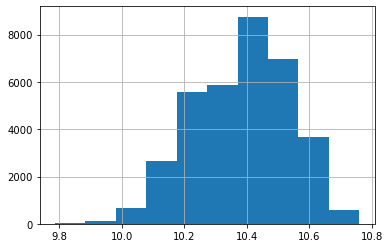

In [34]:
# 이상치 제거 후 Train Set의 타겟 변수 분포 확인
train['Consumption (MWh)'].hist()

## 

- 모델링할 때 datetime은 변수로 사용 불가

In [36]:
X_data = train.drop(['Date','Consumption (MWh)'], axis=1)
y_target = train['Consumption (MWh)']

X_test = test.drop(['Date','Consumption (MWh)'], axis=1)
y_test = test['Consumption (MWh)']

In [37]:
X_train, X_valid, y_train, y_valid=train_test_split(X_data, y_target,
                                                  test_size=0.2, random_state=2021)

In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(27915, 21)
(27915,)
(6979, 21)
(6979,)


In [39]:
print(X_test.shape)
print(y_test.shape)

(1776, 21)
(1776,)


### NGBOOST

In [40]:
start_time=time.time()

In [41]:
ngb = NGBRegressor(Dist=Normal,random_state=0)

ngb.fit(X_train, y_train)

Y_preds = ngb.predict(X_valid)
Y_dists = ngb.pred_dist(X_valid)

[iter 0] loss=-0.4591 val_loss=0.0000 scale=1.0000 norm=0.4802
[iter 100] loss=-1.0723 val_loss=0.0000 scale=2.0000 norm=0.8603
[iter 200] loss=-1.4865 val_loss=0.0000 scale=2.0000 norm=0.9251
[iter 300] loss=-1.6370 val_loss=0.0000 scale=1.0000 norm=0.4762
[iter 400] loss=-1.7077 val_loss=0.0000 scale=1.0000 norm=0.4802


In [42]:
print(time.time()-start_time)

156.00220036506653


In [43]:
# test Mean Squared Error
NG_MSE = mean_squared_error(Y_preds, y_valid)
print("MSE", NG_MSE)
NG_RMSE = np.sqrt(NG_MSE)
print("RMSE", NG_RMSE)

# test Negative Log Likelihood
NLL = -Y_dists.logpdf(y_valid.values.flatten()).mean()
print("NLL", NLL)

MSE 0.003769748227593397
RMSE 0.06139827544478262
NLL -1.732248422748615


In [78]:
plt.figure(figsize=(20,8))
Y_dists[2]

<Figure size 1440x576 with 0 Axes>

#### Feature Importance

In [94]:
feature_importance_loc = ngb.feature_importances_[0]
feature_importance_scale = ngb.feature_importances_[1]

### test 예측 후 실제값과 비교

In [47]:
Y_test_preds = ngb.predict(X_test)
Y_test_dists = ngb.pred_dist(X_test)

In [48]:
predictions = pd.DataFrame(Y_test_dists.loc, columns=['Predictions'])
predictions_upper = pd.DataFrame(Y_test_dists.dist.interval(0.95)[1], columns=['Predictions_upper'])
predictions_lower = pd.DataFrame(Y_test_dists.dist.interval(0.95)[0], columns=['Predictions_lower'])

In [68]:
df_figure = pd.concat([test[['Date','rolling_mean_t168', 'Consumption (MWh)']], predictions, predictions_lower, predictions_upper], axis=1)
df_figure

,Date,rolling_mean_t168,Consumption (MWh),Predictions,Predictions_lower,Predictions_upper
0,2020-01-01 00:00:00,10.373452,10.244466,10.241495,10.105473,10.377517
1,2020-01-01 01:00:00,10.319549,10.186763,10.177068,10.044861,10.309275
2,2020-01-01 02:00:00,10.282826,10.138124,10.159973,10.028978,10.290968
3,2020-01-01 03:00:00,10.261006,10.098747,10.142772,10.011777,10.273767
4,2020-01-01 04:00:00,10.252256,10.074558,10.118268,9.978278,10.258259
...,...,...,...,...,...,...
1771,2020-03-14 19:00:00,10.490371,10.494452,10.488748,10.414557,10.562939
1772,2020-03-14 20:00:00,10.474037,10.483987,10.478176,10.404975,10.551377
1773,2020-03-14 21:00:00,10.451366,10.454384,10.453101,10.377236,10.528966
1774,2020-03-14 22:00:00,10.398300,10.416152,10.412175,10.338264,10.486086


In [69]:
df_figure.isna().sum()

Date                 0
rolling_mean_t168    0
Consumption (MWh)    0
Predictions          0
Predictions_lower    0
Predictions_upper    0
dtype: int64

In [79]:
def plot_results(df):
    fig, ax = plt.subplots(figsize=(22, 5))
    plt.plot(df['Date'], df.Predictions, label = 'Predicted_공급량', color='b', lw=2)
    plt.fill_between(df['Date'], df.Predictions_lower,  df.Predictions_upper,label = '95% Prediction Interval', color='gray', alpha=0.5)
    plt.scatter(df['Date'], df['Consumption (MWh)'], label = 'Actual_공급량', color='g', lw=3)
    ax.legend(fontsize = 14)
    plt.title('Actual_공급량 vs. Predicted Values with Prediction Intervals')
    plt.show()

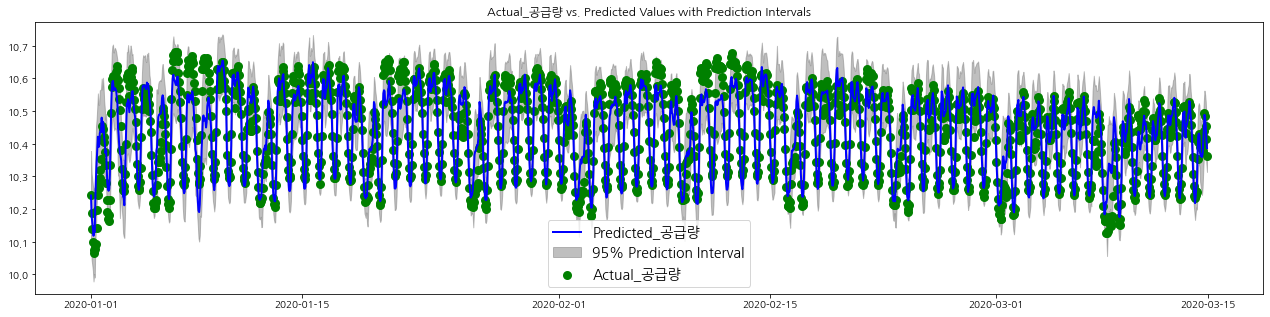

In [80]:
plot_results(df_figure)

In [81]:
df_figure_fw = df_figure.set_index('Date').loc['2020-01-01 00:00:00':'2020-01-08 00:00:00', :].reset_index()
df_figure_fw

,Date,rolling_mean_t168,Consumption (MWh),Predictions,Predictions_lower,Predictions_upper
0,2020-01-01 00:00:00,10.373452,10.244466,10.241495,10.105473,10.377517
1,2020-01-01 01:00:00,10.319549,10.186763,10.177068,10.044861,10.309275
2,2020-01-01 02:00:00,10.282826,10.138124,10.159973,10.028978,10.290968
3,2020-01-01 03:00:00,10.261006,10.098747,10.142772,10.011777,10.273767
4,2020-01-01 04:00:00,10.252256,10.074558,10.118268,9.978278,10.258259
...,...,...,...,...,...,...
164,2020-01-07 20:00:00,10.404196,10.585567,10.482173,10.389768,10.574578
165,2020-01-07 21:00:00,10.362368,10.561303,10.447512,10.346928,10.548095
166,2020-01-07 22:00:00,10.306229,10.532486,10.383493,10.243773,10.523212
167,2020-01-07 23:00:00,10.291727,10.480050,10.372365,10.239460,10.505270


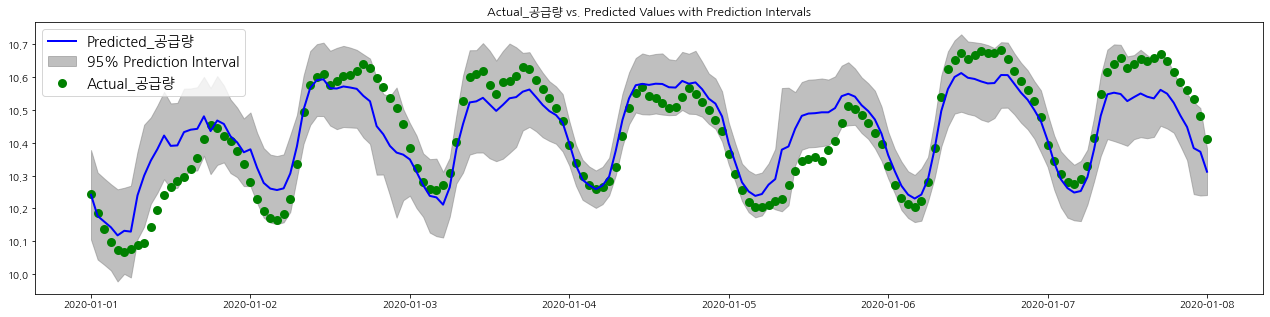

In [82]:
plot_results(df_figure_fw)

#### 파라미터 튜닝

In [58]:
model_ngb = NGBRegressor(n_estimators=800,  natural_gradient=True, learning_rate = 0.01,Base=default_tree_learner, Dist=Normal, Score=MLE, verbose_eval =50)
model_ngb.fit(X_train, y_train, X_val = X_valid, Y_val = y_valid, early_stopping_rounds = 10)

[iter 0] loss=-0.4591 val_loss=-0.4673 scale=1.0000 norm=0.4802
[iter 50] loss=-0.7700 val_loss=-0.7752 scale=1.0000 norm=0.3923
[iter 100] loss=-1.0723 val_loss=-1.0785 scale=2.0000 norm=0.8603
[iter 150] loss=-1.3184 val_loss=-1.3211 scale=2.0000 norm=0.9064
[iter 200] loss=-1.4865 val_loss=-1.4823 scale=2.0000 norm=0.9251
[iter 250] loss=-1.5809 val_loss=-1.5716 scale=2.0000 norm=0.9400
[iter 300] loss=-1.6370 val_loss=-1.6235 scale=1.0000 norm=0.4762
[iter 350] loss=-1.6769 val_loss=-1.6619 scale=1.0000 norm=0.4805
[iter 400] loss=-1.7077 val_loss=-1.6907 scale=1.0000 norm=0.4802
[iter 450] loss=-1.7302 val_loss=-1.7117 scale=1.0000 norm=0.4828
[iter 500] loss=-1.7513 val_loss=-1.7324 scale=1.0000 norm=0.4819
[iter 550] loss=-1.7693 val_loss=-1.7490 scale=1.0000 norm=0.4812
[iter 600] loss=-1.7851 val_loss=-1.7641 scale=1.0000 norm=0.4808
[iter 650] loss=-1.7979 val_loss=-1.7762 scale=1.0000 norm=0.4813
[iter 700] loss=-1.8092 val_loss=-1.7868 scale=1.0000 norm=0.4811
[iter 750] lo

NGBRegressor(n_estimators=800,
             random_state=RandomState(MT19937) at 0x2167E78FE18,
             verbose_eval=50)

In [59]:
Y_preds = model_ngb.predict(X_valid)
Y_dists = model_ngb.pred_dist(X_valid)

In [60]:
# test Mean Squared Error
NG_MSE = mean_squared_error(Y_preds, y_valid)
print("MSE", NG_MSE)
NG_RMSE = np.sqrt(NG_MSE)
print("RMSE", NG_RMSE)

# test Negative Log Likelihood
NLL = -Y_dists.logpdf(y_valid.values.flatten()).mean()
print("NLL", NLL)

MSE 0.0035340810869042946
RMSE 0.05944813779172813
NLL -1.8030475497612486


#### Decisiontree를 learner로 사용

In [85]:
learner = DecisionTreeRegressor()
model_ngb = NGBRegressor(n_estimators=800,  natural_gradient=True, learning_rate = 0.01,Base=learner, Dist=Normal, Score=MLE, verbose_eval =50)
model_ngb.fit(X_train, y_train, X_val = X_valid, Y_val = y_valid, early_stopping_rounds = 10)

[iter 0] loss=-0.4591 val_loss=-0.4866 scale=2.0000 norm=0.9604
[iter 50] loss=-1.1723 val_loss=-1.0975 scale=2.0000 norm=0.8445
[iter 100] loss=-1.6808 val_loss=-1.4169 scale=2.0000 norm=0.9500
== Early stopping achieved.
== Best iteration / VAL125 (val_loss=-1.4720)


NGBRegressor(Base=DecisionTreeRegressor(), n_estimators=800,
             random_state=RandomState(MT19937) at 0x2167E78FE18,
             verbose_eval=50)

In [86]:
Y_preds = model_ngb.predict(X_valid)
Y_dists = model_ngb.pred_dist(X_valid)

In [87]:
# test Mean Squared Error
NG_MSE = mean_squared_error(Y_preds, y_valid)
print("MSE", NG_MSE)
NG_RMSE = np.sqrt(NG_MSE)
print("RMSE", NG_RMSE)

# test Negative Log Likelihood
NLL = -Y_dists.logpdf(y_valid.values.flatten()).mean()
print("NLL", NLL)

MSE 0.0031019640785344984
RMSE 0.055695278781369775
NLL -1.4621733966213004


#### xgboost를 learner로 사용

In [88]:
learner = XGBRegressor()
model_ngb = NGBRegressor(n_estimators=800,  natural_gradient=True, learning_rate = 0.01,Base=learner, Dist=Normal, Score=MLE, verbose_eval =50)
model_ngb.fit(X_train, y_train, X_val = X_valid, Y_val = y_valid, early_stopping_rounds = 10)

C:\Anaconda3\lib\site-packages\xgboost\core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[18:49:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:49:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[iter 0] loss=-0.4591 val_loss=-0.4824 scale=2.0000 norm=0.9604
[18:49:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:49:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:49:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:49:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:50:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:50:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:50:0

[18:52:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:52:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:52:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:53:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:53:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:53:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:53:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:53:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:53:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:57:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[19:00:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:00:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:00:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:00:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:01:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:01:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:01:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:01:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:01:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[19:04:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:04:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:04:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:04:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:04:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:04:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:05:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:05:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:05:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[19:08:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:08:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:08:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:08:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:08:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:08:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:08:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:08:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:08:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[19:12:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:12:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:12:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:12:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:12:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:12:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:12:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:12:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:12:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[19:15:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[iter 250] loss=-2.0757 val_loss=-2.0246 scale=2.0000 norm=0.7798
[19:15:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15

[19:18:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:18:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:18:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:18:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:18:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:18:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:18:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:18:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:18:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[19:21:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:21:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:21:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:21:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:21:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:21:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:21:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:21:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:21:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[19:24:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:24:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:24:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:24:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:24:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:24:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:24:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:24:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:24:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[19:26:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:27:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:27:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:27:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:27:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:27:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:27:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:27:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:27:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[19:31:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:31:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:31:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:31:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:31:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:31:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:31:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:31:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:31:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[19:35:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:35:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:35:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:35:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:35:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:35:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:35:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:35:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:35:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[19:39:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[iter 500] loss=-2.4455 val_loss=-2.2383 scale=4.0000 norm=1.6372
[19:39

[19:43:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[19:47:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:47:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:47:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:47:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:47:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:47:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:47:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:47:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:47:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

NGBRegressor(Base=XGBRegressor(), n_estimators=800,
             random_state=RandomState(MT19937) at 0x2167E78FE18,
             verbose_eval=50)

In [89]:
Y_preds = model_ngb.predict(X_valid)
Y_dists = model_ngb.pred_dist(X_valid)

In [90]:
# test Mean Squared Error
NG_MSE = mean_squared_error(Y_preds, y_valid)
print("MSE", NG_MSE)
NG_RMSE = np.sqrt(NG_MSE)
print("RMSE", NG_RMSE)

# test Negative Log Likelihood
NLL = -Y_dists.logpdf(y_valid.values.flatten()).mean()
print("NLL", NLL)

MSE 0.0011915890217402063
RMSE 0.03451940065731452
NLL -2.250791716730247


#### lgbm을 learner로 사용

In [91]:
learner = LGBMRegressor()
model_ngb = NGBRegressor(n_estimators=200,  natural_gradient=True, learning_rate = 0.01,Base=learner, Dist=Normal, Score=MLE, verbose_eval =50)
model_ngb.fit(X_train, y_train, X_val = X_valid, Y_val = y_valid, early_stopping_rounds = 10)

[iter 0] loss=-0.4591 val_loss=-0.4860 scale=2.0000 norm=0.9604
[iter 50] loss=-1.1230 val_loss=-1.1217 scale=2.0000 norm=0.8005
[iter 100] loss=-1.5819 val_loss=-1.5706 scale=2.0000 norm=0.8697
[iter 150] loss=-2.0044 val_loss=-1.9729 scale=2.0000 norm=0.8553
[iter 200] loss=-2.3802 val_loss=-2.3087 scale=2.0000 norm=0.8042
[iter 250] loss=-2.7805 val_loss=-2.6086 scale=4.0000 norm=1.4673
== Early stopping achieved.
== Best iteration / VAL290 (val_loss=-2.7197)


NGBRegressor(Base=LGBMRegressor(), n_estimators=800,
             random_state=RandomState(MT19937) at 0x2167E78FE18,
             verbose_eval=50)

In [92]:
Y_preds = model_ngb.predict(X_valid)
Y_dists = model_ngb.pred_dist(X_valid)

In [93]:
# test Mean Squared Error
NG_MSE = mean_squared_error(Y_preds, y_valid)
print("MSE", NG_MSE)
NG_RMSE = np.sqrt(NG_MSE)
print("RMSE", NG_RMSE)

# test Negative Log Likelihood
NLL = -Y_dists.logpdf(y_valid.values.flatten()).mean()
print("NLL", NLL)

MSE 0.0003788457955958665
RMSE 0.019463961456904565
NLL -2.712123432210503
